In [1]:
import pandas as pd
import seaborn as sns

In [2]:
parts = pd.read_pickle('pkl/parts.pkl')

In [3]:
parts['BMI'] = parts['wt_kg']/((parts['ht_cm']/100)**2)
parts

,disease,diag_dis,dom_hand,sex,wt_kg,ht_cm,eth_part,rac_part,moth_smk,BMI
BARCODE2,,,,,,,,,,
AC000003,MS,CASE,LEFT,MALE,90.718474,180.34,Non Hispanic or Latino,White,True,27.894052
AC000005,MS,CASE,RIGHT,FEMALE,93.440028,167.64,Non Hispanic or Latino,White,True,33.248929
AC000006,CONTROL,CONTROL,RIGHT,FEMALE,102.058283,162.56,Non Hispanic or Latino,White,False,38.620765
AC000007,CONTROL,CONTROL,LEFT,MALE,79.832257,179.07,Non Hispanic or Latino,White,True,24.896181
AC000009,TM,CASE,RIGHT,FEMALE,58.967008,166.37,Non Hispanic or Latino,White,False,21.303897
...,...,...,...,...,...,...,...,...,...,...
PC001059,CONTROL,CONTROL,RIGHT,MALE,27.215542,132.08,Non Hispanic or Latino,White,True,15.600656
PC001064,CONTROL,CONTROL,RIGHT,FEMALE,58.967008,162.56,Non Hispanic or Latino,White,True,22.314220
PC001065,CONTROL,CONTROL,RIGHT,FEMALE,48.987976,165.10,Non Hispanic or Latino,White,True,17.971956


In [4]:
outlier = parts.BMI.idxmax()
parts.drop(outlier, inplace = True)

<AxesSubplot:xlabel='BMI', ylabel='Density'>

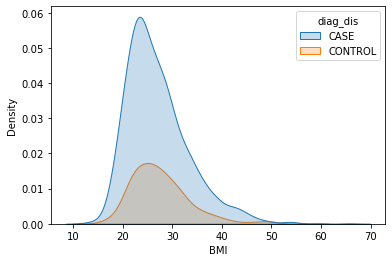

In [5]:
sns.kdeplot(data = parts, x = 'BMI', hue = 'diag_dis', shade = True)

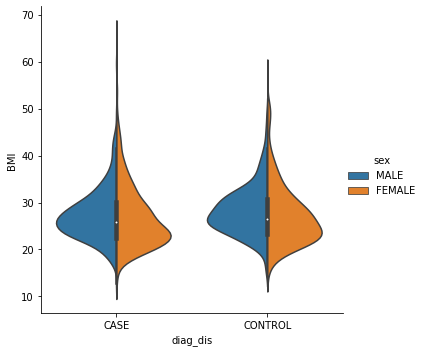

In [6]:
sns.catplot(data=parts, kind='violin', x='diag_dis', y = 'BMI', hue = 'sex', split = True)

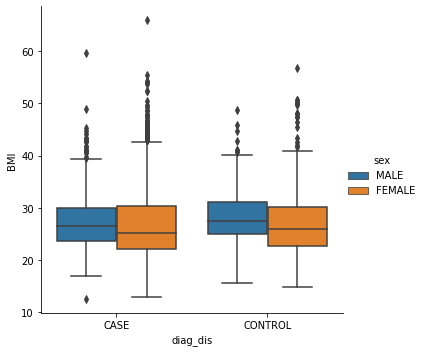

In [7]:
sns.catplot(data=parts, kind='box', x='diag_dis', y = 'BMI', hue = 'sex')

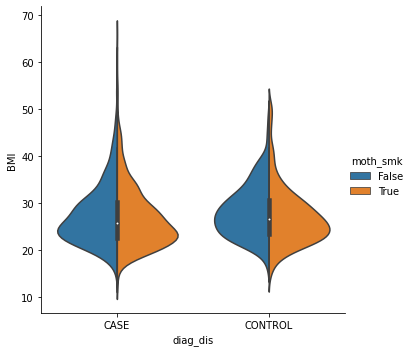

In [8]:
sns.catplot(data=parts, kind='violin', x='diag_dis', y = 'BMI', hue = 'moth_smk', split = True)

In [9]:
parts.diag_dis.value_counts()

CASE       2301
CONTROL     688
Name: diag_dis, dtype: int64

In [10]:
moth_smk_by_diag = parts.moth_smk.groupby(parts['diag_dis']).value_counts()
moth_smk_by_diag


diag_dis  moth_smk
CASE      True        1474
          False        541
CONTROL   True         433
          False        172
Name: moth_smk, dtype: int64

In [11]:
# sns.catplot(data=parts, kind = 'bar', x='diag_dis', y=, hue = 'moth_smk')
# sns.catplot(data=parts, kind = 'bar', x=moth_smk_by_diag.index, y = moth_smk_by_diag, hue = 'moth_smk')

<AxesSubplot:xlabel='diag_dis'>

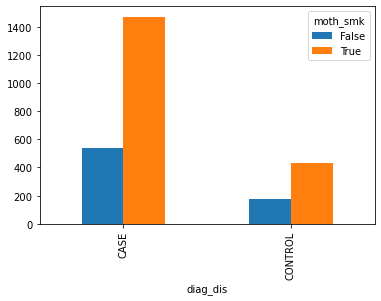

In [12]:
moth_smk_by_diag.unstack().plot(kind='bar')

#### Citation for data.unstack().plot(kind='bar'): https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart

In [167]:
unstacked = moth_smk_by_diag.unstack()
unstacked

moth_smk,False,True
diag_dis,,
CASE,541,1474
CONTROL,172,433


In [166]:
piepattss = unstacked.groupby('diag_dis').CASE

AttributeError: 'DataFrameGroupBy' object has no attribute 'CASE'

In [102]:
newparts = parts.copy()

BARCODE2
AC000003    1.0
AC000005    1.0
AC000006    0.0
AC000007    1.0
AC000009    0.0
           ... 
PC001059    1.0
PC001064    1.0
PC001065    1.0
PC001069    1.0
PC001070    1.0
Name: moth_smk, Length: 2991, dtype: float64

In [109]:
newparts

,disease,diag_dis,dom_hand,sex,wt_kg,ht_cm,eth_part,rac_part,moth_smk,BMI
BARCODE2,,,,,,,,,,
AC000003,MS,CASE,LEFT,MALE,90.718474,180.34,Non Hispanic or Latino,White,True,27.894052
AC000005,MS,CASE,RIGHT,FEMALE,93.440028,167.64,Non Hispanic or Latino,White,True,33.248929
AC000006,CONTROL,CONTROL,RIGHT,FEMALE,102.058283,162.56,Non Hispanic or Latino,White,False,38.620765
AC000007,CONTROL,CONTROL,LEFT,MALE,79.832257,179.07,Non Hispanic or Latino,White,True,24.896181
AC000009,TM,CASE,RIGHT,FEMALE,58.967008,166.37,Non Hispanic or Latino,White,False,21.303897
...,...,...,...,...,...,...,...,...,...,...
PC001059,CONTROL,CONTROL,RIGHT,MALE,27.215542,132.08,Non Hispanic or Latino,White,True,15.600656
PC001064,CONTROL,CONTROL,RIGHT,FEMALE,58.967008,162.56,Non Hispanic or Latino,White,True,22.314220
PC001065,CONTROL,CONTROL,RIGHT,FEMALE,48.987976,165.10,Non Hispanic or Latino,White,True,17.971956


In [110]:
pieparts = newparts.drop(["disease", "dom_hand", "sex", "wt_kg", "ht_cm", "eth_part", "rac_part", "BMI"], axis = 1)
pieparts

,diag_dis,moth_smk
BARCODE2,,
AC000003,CASE,True
AC000005,CASE,True
AC000006,CONTROL,False
AC000007,CONTROL,True
AC000009,CASE,False
...,...,...
PC001059,CONTROL,True
PC001064,CONTROL,True
PC001065,CONTROL,True


In [231]:
pieparts.moth_smk.replace({True: 1, False: 0})

BARCODE2
AC000003    1.0
AC000005    1.0
AC000006    0.0
AC000007    1.0
AC000009    0.0
           ... 
PC001059    1.0
PC001064    1.0
PC001065    1.0
PC001069    1.0
PC001070    1.0
Name: moth_smk, Length: 2991, dtype: float64

In [221]:
case = pieparts.loc[parts.diag_dis == "CASE"]
control = pieparts.loc[parts.diag_dis == "CONTROL"]
CaseT = case.loc[case.moth_smk == 1]
ControlT = control.loc[control.moth_smk == 1]
CaseF = case.loc[case.moth_smk == 0]
ControlF = control.loc[control.moth_smk == 0]

In [233]:
pieparts
pieparts.moth_smk.replace({True: 1, False: 0})

BARCODE2
AC000003    1.0
AC000005    1.0
AC000006    0.0
AC000007    1.0
AC000009    0.0
           ... 
PC001059    1.0
PC001064    1.0
PC001065    1.0
PC001069    1.0
PC001070    1.0
Name: moth_smk, Length: 2991, dtype: float64

In [222]:
totalCase = len(CaseT) + len(CaseF)
totalCase

2015

In [234]:
pieparts

,diag_dis,moth_smk
BARCODE2,,
AC000003,CASE,True
AC000005,CASE,True
AC000006,CONTROL,False
AC000007,CONTROL,True
AC000009,CASE,False
...,...,...
PC001059,CONTROL,True
PC001064,CONTROL,True
PC001065,CONTROL,True


In [230]:
plot = pieparts.plot.pie(y='moth_smk', figsize=(5, 5))

TypeError: no numeric data to plot

In [133]:
totalControl = len(ControlT) + len(ControlF)
mathControl = totalControl / len(ControlT)

In [143]:
plot = pieparts.plot.pie(y='moth_smk', figsize=(10, 10),autopct='%1.1f%%')

In [156]:
CaseT

,diag_dis,moth_smk
BARCODE2,,
AC000003,CASE,True
AC000005,CASE,True
AC000011,CASE,True
AC000013,CASE,True
AC000014,CASE,True
...,...,...
PC001019,CASE,True
PC001037,CASE,True
PC001038,CASE,True


In [ ]:
CaseT.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])

In [162]:
CaseT.moth_smk.replace({True: 1, False: 0})

BARCODE2
AC000003    1
AC000005    1
AC000011    1
AC000013    1
AC000014    1
           ..
PC001019    1
PC001037    1
PC001038    1
PC001042    1
PC001058    1
Name: moth_smk, Length: 1474, dtype: int64

In [175]:
cols = ["diag_dis","moth_smk"]
CaseT["CaseTrue"] = CaseT[cols].astype(str).apply(lambda x: '/'.join(x))
newCaseT = CaseT.drop(["diag_dis", "moth_smk"], axis = 1)
newCaseT['CaseTrue'] = newCaseT['CaseTrue'].fillna('CT')
newCaseT


/var/folders/_g/dr204lbj3s1c6m88fsk34kch0000gn/T/ipykernel_3095/82752456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CaseT["CaseTrue"] = CaseT[cols].astype(str).apply(lambda x: '/'.join(x))


,CaseTrue
BARCODE2,
AC000003,CT
AC000005,CT
AC000011,CT
AC000013,CT
AC000014,CT
...,...
PC001019,CT
PC001037,CT
PC001038,CT


In [184]:
CaseF["CaseFalse"] = CaseF[cols].astype(str).apply(lambda x: '/'.join(x))
newCaseF = CaseF.drop(["diag_dis", "moth_smk"], axis = 1)
newCaseF['CaseFalse'] = newCaseF['CaseFalse'].fillna('CF')
newCaseF

/var/folders/_g/dr204lbj3s1c6m88fsk34kch0000gn/T/ipykernel_3095/1906934222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CaseF["CaseFalse"] = CaseF[cols].astype(str).apply(lambda x: '/'.join(x))


,CaseFalse
BARCODE2,
AC000009,CF
AC000019,CF
AC000036,CF
AC000058,CF
AC000060,CF
...,...
AC003563,CF
AC003578,CF
PC000387,CF


In [224]:
CaseTF = newCaseT.join(newCaseF)
CaseTF['CaseFalse'] = CaseTF['CaseFalse'].fillna('CF')
#CaseTF.count()
len(CaseTrue)

CaseTrue     1474
CaseFalse    1474
dtype: int64

In [228]:
CaseTF

,CaseTrue,CaseFalse
BARCODE2,,
AC000003,CT,CF
AC000005,CT,CF
AC000011,CT,CF
AC000013,CT,CF
AC000014,CT,CF
...,...,...
PC001019,CT,CF
PC001037,CT,CF
PC001038,CT,CF


In [209]:
len('CaseTrue')

8

In [208]:
totaal = len('CaseTrue') + len('CaseFalse')
totaal

17

In [203]:
plot = CaseTF.plot.pie(y='CaseTF', figsize=(10, 10),autopct='%1.1f%%')

KeyError: 'CaseTF'